# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

In this project we have tried to find an optimal location for a **Café**. Specifically, this report is targeted towards stakeholders interested in opening a **Café** in a neighborhood in **Brooklyn**, New York City.

Four important parameters were considered while selecting the final location for the cafe:
1. Population of the neighborhood
2. Average Household income of the neighborhood
3. Average asking rent PSF (Ground Floor Retail) in the neighborhood
4. Most visited venues in the neighborhood (using Foursquare API)

Due to limited availability of Average asking rent PSF data on the internet, the following **major Brooklyn Corridors** were taken into consideration:
1. Greenpoint
2. Williamsburg
3. DUMBO-Downtown Brooklyn-Boerum Hill
4. Brooklyn Heights-Cobble Hill
5. Prospect Heights
6. Park Slope
7. Bay Ridge-Fort Hamilton

Also, as can be seen above, some of the neighborhoods were combined as one entity as in the geojson file which will be used to plot maps.

## Data <a name="data"></a>

Following data sources were used to extract the required information:

1. To obtain the population data, https://www.worldatlas.com/articles/brooklyn-neighborhoods-by-population.html was referred.
2. Average Household income data of the neighborhoods was taken from the website https://www.point2homes.com/US/Neighborhood/NY/Brooklyn-Demographics.html .
3. Average asking rent PSF (Ground Floor Retail) in the neighborhoods was taken from the website https://www.rebny.com/content/dam/rebny/Documents/PDF/News/Research/Retail%20Reports/2020_Winter_BrooklynRetailReport.pdf . This is the **Winter 2020 report** published on date 17th March, 2020 by **REBNY**.
4. The data of most visited venues in the neighborhoods was obtained using **Foursquare API**.

To generate the dataframes from the information obtained using the websites mentioned above, the data was arranged into a separate excel file for each parameter. These files can be found in the same github folder as this report.

The results from all the four parameters will be combined to get to the final solution, i.e., the most favorable location for opening a Café in Brooklyn.
The results are based on the four parameters stated above, however, some other factors can be taken into consideration according to individual's priorities.

## Methodology <a name="methodology"></a>

The methodology for selection of the optimum location will be as follows:

1. Neighborhoods with larger population will be targeted. This will be visualized with the help of Choropleth map.

2. Neighborhoods with higher Average Household Income will be given preference. A bar Chart will help to make it easy to pick such neighborhoods.

3. Neighborhoods with comparatively lesser Average Asking Rent PSF will be given priority. A bar chart will make this comparison easier.

4. Neighborhoods where Cafés are visited frequently will be favored. This data will be obtained from Foursquare API.

Results from all the four parameters will be combined to reach to the final solution.

The neighborhood which has favorable conditions according to all the four parameters will be selected as the best location for the Café.

## Analysis <a name="analysis"></a>

### 1. Population

Data of population of the neighborhoods obtained from the internet was compiled in an excel file. The excel file is available in the same folder as this notebook. (File name: Brooklyn Neighborhood Population.xlsx)

This file was used to generate the dataframe and the Choropleth map.

In [1]:
import pandas as pd
import numpy as np
import folium

In [2]:
df_bro_pop = pd.read_excel('Documents\Brooklyn Neighborhood Population.xlsx',
                     sheet_name='Sheet1')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_bro_pop

Neighborhood  Population
0                           Greenpoint       34719
1                         Williamsburg       32926
2  DUMBO-Downtown Brooklyn-Boerum Hill       35120
3         Brooklyn Heights-Cobble Hill       28101
4                     Prospect Heights       19849
5                           Park Slope       65047
6              Bay Ridge-Fort Hamilton      108346

In [4]:
bro_geo = r'Documents\Neighborhood Tabulation Areas (NTA).geojson'

In [5]:
bro_map = folium.Map(location=[40.650002, -73.949997], zoom_start=12) # (40.650002, -73.949997) are Geographical Coordinates of Brooklyn

bro_map

In [6]:
folium.Choropleth(
    geo_data=bro_geo,
    data=df_bro_pop,
    columns=['Neighborhood', 'Population'],
    key_on='feature.properties.ntaname',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population of Neighborhoods in Brooklyn'
).add_to(bro_map)

In [7]:
bro_map

From this map, we can see that the neighborhoods Bay Ridge-Fort Hamilton, Park Slope, DUMBO-Downtown Brooklyn-Boerum Hill and Greenpoint have the maximum population.

### 2. Average Household Income

Data of Average Household Income of the neighborhoods obtained from the internet was compiled in an excel file. The excel file is available in the same folder as this notebook. (File name: Brooklyn Neighborhood Household Income.xlsx)

This file was used to generate the dataframe and the Bar Chart.

In [8]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
df_bro_inc = pd.read_excel('Documents\Brooklyn Neighborhood Household Income.xlsx',
                     sheet_name='Sheet1')
df_bro_inc

Neighborhood  \
0                           Greenpoint   
1                         Williamsburg   
2  DUMBO-Downtown Brooklyn-Boerum Hill   
3         Brooklyn Heights-Cobble Hill   
4                     Prospect Heights   
5                           Park Slope   
6              Bay Ridge-Fort Hamilton   

   Average Household Income per Year (in Dollars)  
0                                          106860  
1                                           91311  
2                                          179785  
3                                          180237  
4                                          123950  
5                                          167058  
6                                           90551

In [10]:
df_bro_inc.set_index('Neighborhood', inplace = True)
df_bro_inc

Average Household Income per Year (in Dollars)
Neighborhood                                                                       
Greenpoint                                                                   106860
Williamsburg                                                                  91311
DUMBO-Downtown Brooklyn-Boerum Hill                                          179785
Brooklyn Heights-Cobble Hill                                                 180237
Prospect Heights                                                             123950
Park Slope                                                                   167058
Bay Ridge-Fort Hamilton                                                       90551

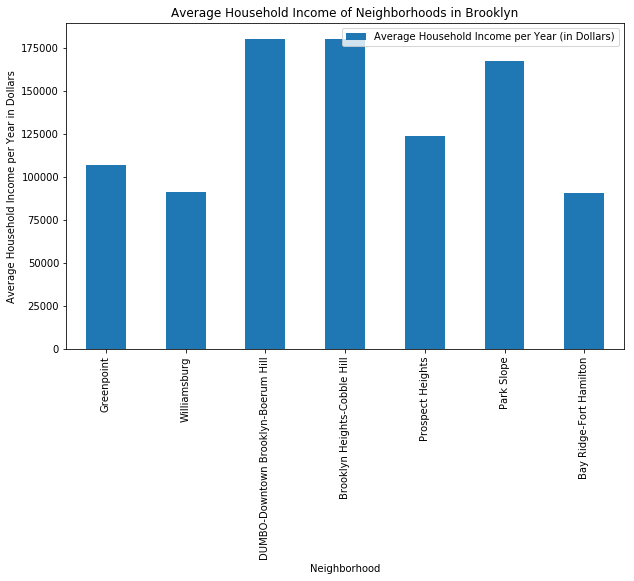

In [11]:
df_bro_inc.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood')
plt.ylabel('Average Household Income per Year in Dollars')
plt.title('Average Household Income of Neighborhoods in Brooklyn')

plt.show()

As per the bar chart, we can see that the neighborhoods DUMBO-Downtown Brooklyn-Boerum Hill, Brooklyn Heights-Cobble Hill, Park Slope and Prospect Heights have a good Average Household Income.

### 3. Average Asking Rent PSF 

Data of Average Asking Rent PSF of the neighborhoods obtained from the internet was compiled in an excel file. The excel file is available in the same folder as this notebook. (File name: Brooklyn Neighborhood Rent PSF.xlsx)

This file was used to generate the dataframe and the Bar Chart.

In [12]:
df_bro_psf = pd.read_excel('Documents\Brooklyn Neighborhood Rent PSF.xlsx',
                     sheet_name='Sheet1')
df_bro_psf

Neighborhood  \
0                           Greenpoint   
1                         Williamsburg   
2  DUMBO-Downtown Brooklyn-Boerum Hill   
3         Brooklyn Heights-Cobble Hill   
4                     Prospect Heights   
5                           Park Slope   
6              Bay Ridge-Fort Hamilton   

   Average Asking Rent PSF- Ground Floor Retail   
0                                             70  
1                                            178  
2                                            174  
3                                            104  
4                                            134  
5                                             99  
6                                            119

In [13]:
df_bro_psf.set_index('Neighborhood', inplace = True)
df_bro_psf

Average Asking Rent PSF- Ground Floor Retail 
Neighborhood                                                                      
Greenpoint                                                                      70
Williamsburg                                                                   178
DUMBO-Downtown Brooklyn-Boerum Hill                                            174
Brooklyn Heights-Cobble Hill                                                   104
Prospect Heights                                                               134
Park Slope                                                                      99
Bay Ridge-Fort Hamilton                                                        119

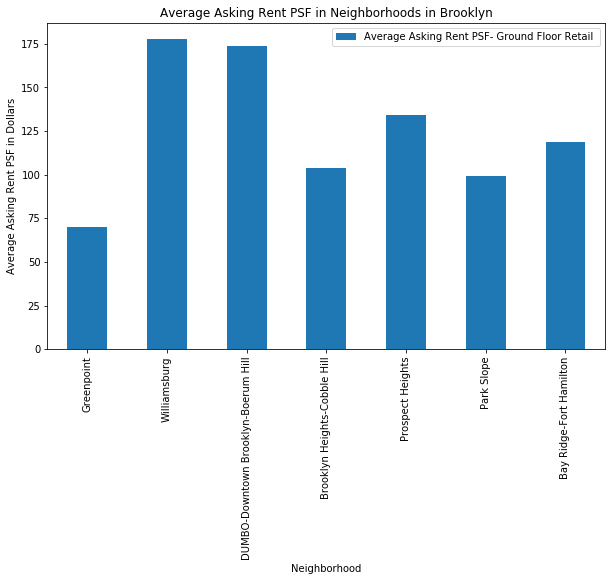

In [14]:
df_bro_psf.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood')
plt.ylabel('Average Asking Rent PSF in Dollars')
plt.title('Average Asking Rent PSF in Neighborhoods in Brooklyn')

plt.show()

As per the bar chart, we can see that the neighborhoods Greenpoint, Park Slope, Brooklyn Heights-Cobble Hill and Bay Ridge-Fort Hamilton have a low Average Asking Rent PSF.

### 4. Most Visited Venues Using Foursquare API

Using Foursquare API, most visited venues in each neighborhood were identified. The neighborhoods were clustered in 4 clusters to  identify neighborhoods where Cafés are among the most visited venues. A radius of 500 metres and a limit of 50 was set while making the API call.

Data of coordinates of the neighborhoods obtained from the internet was compiled in an excel file. The excel file is available in the same folder as this notebook. (File name: Brooklyn Neighborhood Coordinates.xlsx)

This file was used to generate the dataframe and was used for the purpose of clustering.

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [16]:
bro_coord = pd.read_excel('Documents\Brooklyn Neighborhood Coordinates.xlsx',
                     sheet_name='Sheet1')
bro_coord

Neighborhood   Latitude  Longitude
0          Greenpoint  40.730201 -73.954241
1        Williamsburg  40.707144 -73.958115
2               DUMBO  40.703176 -73.988753
3   Downtown Brooklyn  40.690844 -73.983463
4         Boerum Hill  40.685683 -73.983748
5    Brooklyn Heights  40.695864 -73.993782
6         Cobble Hill  40.687920 -73.998561
7    Prospect Heights  40.676822 -73.964859
8          Park Slope  40.672321 -73.977050
9           Bay Ridge  40.625801 -74.030621
10      Fort Hamilton  40.614768 -74.031979

In [39]:
CLIENT_ID = '******'
CLIENT_SECRET = '******'
VERSION = '20202407'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ******
CLIENT_SECRET:******


In [18]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT= 50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
brooklyn_venues = getNearbyVenues(names=bro_coord['Neighborhood'],
                                   latitudes=bro_coord['Latitude'],
                                   longitudes=bro_coord['Longitude']
                                  )

Greenpoint
Williamsburg
DUMBO
Downtown Brooklyn
Boerum Hill
Brooklyn Heights
Cobble Hill
Prospect Heights
Park Slope
Bay Ridge
Fort Hamilton


In [22]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(535, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude     Venue  \
0   Greenpoint              40.730201              -73.954241  goodyoga   
1   Greenpoint              40.730201              -73.954241   Oxomoco   
2   Greenpoint              40.730201              -73.954241   Karczma   
3   Greenpoint              40.730201              -73.954241  Temkin’s   
4   Greenpoint              40.730201              -73.954241  Friducha   

   Venue Latitude  Venue Longitude      Venue Category  
0       40.730010       -73.956167         Yoga Studio  
1       40.729981       -73.955460  Mexican Restaurant  
2       40.730102       -73.955092   Polish Restaurant  
3       40.730389       -73.953554                 Bar  
4       40.731512       -73.954281  Mexican Restaurant

In [23]:
brooklyn_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                              
Bay Ridge                             50                      50     50   
Boerum Hill                           50                      50     50   
Brooklyn Heights                      50                      50     50   
Cobble Hill                           50                      50     50   
DUMBO                                 50                      50     50   
Downtown Brooklyn                     50                      50     50   
Fort Hamilton                         50                      50     50   
Greenpoint                            50                      50     50   
Park Slope                            50                      50     50   
Prospect Heights                      50                      50     50   
Williamsburg                          35                      35     35   

                   Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                        
Bay Ridge                      50               50              50  
Boerum Hill                    50               50              50  
Brooklyn Heights               50               50              50  
Cobble Hill                    50               50              50  
DUMBO                          50               50              50  
Downtown Brooklyn              50               50              50  
Fort Hamilton                  50               50              50  
Greenpoint                     50               50              50  
Park Slope                     50               50              50  
Prospect Heights               50               50              50  
Williamsburg                   35               35              35

In [24]:
print('There are {} unique categories.'.format(len(brooklyn_venues['Venue Category'].unique())))

There are 151 unique categories.


In [25]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

Neighborhood  Accessories Store  American Restaurant  Antique Shop  \
0   Greenpoint                  0                    0             0   
1   Greenpoint                  0                    0             0   
2   Greenpoint                  0                    0             0   
3   Greenpoint                  0                    0             0   
4   Greenpoint                  0                    0             0   

   Art Gallery  Asian Restaurant  Athletics & Sports  BBQ Joint  Bagel Shop  \
0            0                 0                   0          0           0   
1            0                 0                   0          0           0   
2            0                 0                   0          0           0   
3            0                 0                   0          0           0   
4            0                 0                   0          0           0   

   Bakery  Bank  Bar  Beach  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0       0     0    0      0         0            0           0              0   
1       0     0    0      0         0            0           0              0   
2       0     0    0      0         0            0           0              0   
3       0     0    1      0         0            0           0              0   
4       0     0    0      0         0            0           0              0   

   Board Shop  Bookstore  Boutique  Boxing Gym  Breakfast Spot  Brewery  \
0           0          0         0           0               0        0   
1           0          0         0           0               0        0   
2           0          0         0           0               0        0   
3           0          0         0           0               0        0   
4           0          0         0           0               0        0   

   Bubble Tea Shop  Burger Joint  Burrito Place  Business Service  Café  \
0                0             0              0                 0     0   
1                0             0              0                 0     0   
2                0             0              0                 0     0   
3                0             0              0                 0     0   
4                0             0              0                 0     0   

   Cajun / Creole Restaurant  Candy Store  Caribbean Restaurant  \
0                          0            0                     0   
1                          0            0                     0   
2                          0            0                     0   
3                          0            0                     0   
4                          0            0                     0   

   Caucasian Restaurant  Chinese Restaurant  Climbing Gym  Clothing Store  \
0                     0                   0             0               0   
1                     0                   0             0               0   
2                     0                   0             0               0   
3                     0                   0             0               0   
4                     0                   0             0               0   

   Cocktail Bar  Coffee Shop  Concert Hall  Cosmetics Shop  Creperie  \
0             0            0             0               0         0   
1             0            0             0               0         0   
2             0            0             0               0         0   
3             0            0             0               0         0   
4             0            0             0               0         0   

   Cycle Studio  Dance Studio  Deli / Bodega  Department Store  Dessert Shop  \
0             0             0              0                 0             0   
1             0             0              0                 0             0   
2             0             0              0                 0             0   
3             0             0              0                 0             0   
4     

In [26]:
brooklyn_onehot.shape

(535, 152)

In [27]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped

Neighborhood  Accessories Store  American Restaurant  Antique Shop  \
0           Bay Ridge               0.00                 0.04          0.00   
1         Boerum Hill               0.00                 0.02          0.02   
2    Brooklyn Heights               0.00                 0.00          0.00   
3         Cobble Hill               0.00                 0.02          0.00   
4               DUMBO               0.00                 0.04          0.02   
5   Downtown Brooklyn               0.00                 0.00          0.00   
6       Fort Hamilton               0.00                 0.02          0.00   
7          Greenpoint               0.00                 0.00          0.00   
8          Park Slope               0.02                 0.02          0.00   
9    Prospect Heights               0.00                 0.02          0.00   
10       Williamsburg               0.00                 0.00          0.00   

    Art Gallery  Asian Restaurant  Athletics & Sports  BBQ Joint  Bagel Shop  \
0      0.000000              0.00                0.00       0.00    0.040000   
1      0.000000              0.00                0.02       0.00    0.000000   
2      0.000000              0.02                0.02       0.00    0.000000   
3      0.000000              0.00                0.00       0.00    0.020000   
4      0.040000              0.00                0.00       0.00    0.020000   
5      0.000000              0.02                0.00       0.02    0.000000   
6      0.000000              0.02                0.00       0.00    0.020000   
7      0.000000              0.00                0.00       0.00    0.000000   
8      0.000000              0.00                0.00       0.00    0.060000   
9      0.000000              0.00                0.00       0.00    0.000000   
10     0.028571              0.00                0.00       0.00    0.057143   

    Bakery  Bank       Bar  Beach  Beer Bar  Beer Garden  Beer Store  \
0     0.00  0.00  0.040000   0.00      0.00         0.00        0.00   
1     0.02  0.00  0.080000   0.00      0.00         0.00        0.00   
2     0.04  0.00  0.040000   0.02      0.00         0.00        0.00   
3     0.00  0.00  0.040000   0.00      0.00         0.00        0.00   
4     0.06  0.00  0.020000   0.02      0.00         0.00        0.00   
5     0.02  0.02  0.020000   0.00      0.02         0.00        0.00   
6     0.02  0.04  0.020000   0.00      0.00         0.02        0.00   
7     0.02  0.00  0.100000   0.00      0.02         0.00        0.02   
8     0.04  0.00  0.000000   0.00      0.00         0.00        0.00   
9     0.04  0.00  0.100000   0.00      0.04         0.00        0.00   
10    0.00  0.00  0.085714   0.00      0.00         0.00        0.00   

    Big Box Store  Board Shop  Bookstore  Boutique  Boxing Gym  \
0            0.00        0.00       0.02      0.00        0.00   
1            0.00        0.00       0.02      0.00        0.00   
2            0.00        0.00       0.00      0.00        0.00   
3            0.00        0.00       0.04      0.02        0.00   
4            0.00        0.00       0.02      0.00        0.04   
5            0.02        0.00       0.00      0.00        0.00   
6            0.00        0.02       0.00      0.00        0.00   
7            0.00        0.00       0.02      0.02        0.00   
8            0.00        0.00       0.02      0.00        0.00   
9            0.00        0.00       0.00      0.00        0.00   
10           0.00        0.00       0.00      0.00        0.00   

    Breakfast Spot  Brewery  Bubble Tea Shop  Burger Joint  Burrito Place  \
0         0.020000     0.00             0.00      0.000000           0.00   
1         0.000000     0.00             0.00      0.000000           0.02   
2         0.000000     0.00             0.00      0.020000           0.00   
3         0.000000     0.00             0.00      0.000000           0.00   
4         0.000000     0.00             0.00      0.0000

In [28]:
brooklyn_grouped.shape

(11, 152)

In [29]:
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bay Ridge----
                venue  freq
0                 Spa  0.10
1  Italian Restaurant  0.08
2         Pizza Place  0.06
3      Ice Cream Shop  0.04
4       Grocery Store  0.04


----Boerum Hill----
                    venue  freq
0                     Bar  0.08
1  Furniture / Home Store  0.06
2       French Restaurant  0.06
3             Coffee Shop  0.06
4             Yoga Studio  0.04


----Brooklyn Heights----
                venue  freq
0         Yoga Studio  0.08
1              Bakery  0.04
2  Italian Restaurant  0.04
3         Coffee Shop  0.04
4                 Gym  0.04


----Cobble Hill----
                       venue  freq
0               Cocktail Bar  0.08
1         Italian Restaurant  0.06
2                Yoga Studio  0.06
3                  Bookstore  0.04
4  Middle Eastern Restaurant  0.04


----DUMBO----
            venue  freq
0            Park  0.10
1     Coffee Shop  0.08
2          Bakery  0.06
3     Yoga Studio  0.04
4  Scenic Lookout  0.04


----Downtow

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0           Bay Ridge                   Spa    Italian Restaurant   
1         Boerum Hill                   Bar           Coffee Shop   
2    Brooklyn Heights           Yoga Studio                  Park   
3         Cobble Hill          Cocktail Bar           Yoga Studio   
4               DUMBO                  Park           Coffee Shop   
5   Downtown Brooklyn           Coffee Shop        Sandwich Place   
6       Fort Hamilton    Chinese Restaurant                  Bank   
7          Greenpoint                   Bar           Coffee Shop   
8          Park Slope           Coffee Shop            Bagel Shop   
9    Prospect Heights                   Bar          Cocktail Bar   
10       Williamsburg                   Bar           Coffee Shop   

     3rd Most Common Venue 4th Most Common Venue      5th Most Common Venue  \
0              Pizza Place   American Restaurant                 Hookah Bar   
1   Furniture / Home Store     French Restaurant             Cosmetics Shop   
2           Ice Cream Shop    Italian Restaurant              Deli / Bodega   
3       Italian Restaurant             Bookstore  Middle Eastern Restaurant   
4                   Bakery           Yoga Studio        American Restaurant   
5             Burger Joint         Grocery Store      Performing Arts Venue   
6           Sandwich Place           Pizza Place                 Steakhouse   
7             Cocktail Bar           Pizza Place                Yoga Studio   
8              Pizza Place    Italian Restaurant         Mexican Restaurant   
9          Thai Restaurant    Mexican Restaurant                   Beer Bar   
10              Bagel Shop           Pizza Place                Yoga Studio   

   6th Most Common Venue 7th Most Common Venue    8th Most Common Venue  \
0       Greek Restaurant         Grocery Store               Bagel Shop   
1         Sandwich Place                   Spa              Yoga Studio   
2            Coffee Shop                   Gym           Scenic Lookout   
3             Restaurant                   Bar          Thai Restaurant   
4                    Gym           Art Gallery               Boxing Gym   
5                  Diner         Burrito Place                Roof Deck   
6                    Pub         Deli / Bodega             Cocktail Bar   
7                   Café    Mexican Restaurant                Gastropub   
8                 Bakery          Burger Joint                      Spa   
9            Coffee Shop                Bakery  New American Restaurant   
10            Steakhouse   Japanese Restaurant           Clothing Store   

     9th Most Common Venue 10th Most Common Venue  
0           Ice Cream Shop                    Bar  
1                Gift Shop      Indian Restaurant  
2                      Bar                 Bakery  
3              Flower Shop         Ice Cream Shop  
4                     Café         Scenic Lookout  
5                     Café                  Plaza  
6     Gym / Fitness Center    Japanese Restaurant  
7             Liquor Store             Beer Store  
8   Furniture / Home Store            Yoga Studio  
9           Ice Cream Shop              Wine Shop  
10          Breakfast Spot      Korean Restaurant

In [32]:
kclusters = 4

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

kmeans.labels_[0:10]

array([3, 1, 0, 2, 0, 1, 1, 2, 3, 2])

In [33]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brooklyn_merged = bro_coord

brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged

Neighborhood   Latitude  Longitude  Cluster Labels  \
0          Greenpoint  40.730201 -73.954241               2   
1        Williamsburg  40.707144 -73.958115               3   
2               DUMBO  40.703176 -73.988753               0   
3   Downtown Brooklyn  40.690844 -73.983463               1   
4         Boerum Hill  40.685683 -73.983748               1   
5    Brooklyn Heights  40.695864 -73.993782               0   
6         Cobble Hill  40.687920 -73.998561               2   
7    Prospect Heights  40.676822 -73.964859               2   
8          Park Slope  40.672321 -73.977050               3   
9           Bay Ridge  40.625801 -74.030621               3   
10      Fort Hamilton  40.614768 -74.031979               1   

   1st Most Common Venue 2nd Most Common Venue   3rd Most Common Venue  \
0                    Bar           Coffee Shop            Cocktail Bar   
1                    Bar           Coffee Shop              Bagel Shop   
2                   Park           Coffee Shop                  Bakery   
3            Coffee Shop        Sandwich Place            Burger Joint   
4                    Bar           Coffee Shop  Furniture / Home Store   
5            Yoga Studio                  Park          Ice Cream Shop   
6           Cocktail Bar           Yoga Studio      Italian Restaurant   
7                    Bar          Cocktail Bar         Thai Restaurant   
8            Coffee Shop            Bagel Shop             Pizza Place   
9                    Spa    Italian Restaurant             Pizza Place   
10    Chinese Restaurant                  Bank          Sandwich Place   

   4th Most Common Venue      5th Most Common Venue 6th Most Common Venue  \
0            Pizza Place                Yoga Studio                  Café   
1            Pizza Place                Yoga Studio            Steakhouse   
2            Yoga Studio        American Restaurant                   Gym   
3          Grocery Store      Performing Arts Venue                 Diner   
4      French Restaurant             Cosmetics Shop        Sandwich Place   
5     Italian Restaurant              Deli / Bodega           Coffee Shop   
6              Bookstore  Middle Eastern Restaurant            Restaurant   
7     Mexican Restaurant                   Beer Bar           Coffee Shop   
8     Italian Restaurant         Mexican Restaurant                Bakery   
9    American Restaurant                 Hookah Bar      Greek Restaurant   
10           Pizza Place                 Steakhouse                   Pub   

   7th Most Common Venue    8th Most Common Venue   9th Most Common Venue  \
0     Mexican Restaurant                Gastropub            Liquor Store   
1    Japanese Restaurant           Clothing Store          Breakfast Spot   
2            Art Gallery               Boxing Gym                    Café   
3          Burrito Place                Roof Deck                    Café   
4                    Spa              Yoga Studio               Gift Shop   
5                    Gym           Scenic Lookout                     Bar   
6                    Bar          Thai Restaurant             Flower Shop   
7                 Bakery  New American Restaurant          Ice Cream Shop   
8           Burger Joint                      Spa  Furniture / Home Store   
9          Grocery Store               Bagel Shop          Ice Cream Shop   
10         Deli / Bodega             Cocktail Bar    Gym / Fitness Center   

   10th Most Common Venue  
0              Beer Store  
1       Korean Restaurant  
2          Scenic Lookout  
3                   Plaza  
4       Indian Restaurant  
5                  Bakery  
6          Ice Cream Shop  
7               Wine Shop  
8             Yoga Studio  
9                     Bar  
10    Japanese Restaurant

In [34]:
# create map
map_clusters = folium.Map(location=[40.650002, -73.949997], zoom_start=11) # (40.650002, -73.949997) are Geographical Coordinates of Brooklyn

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [35]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[0] + list(range(4, brooklyn_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
2             DUMBO                  Park           Coffee Shop   
5  Brooklyn Heights           Yoga Studio                  Park   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
2                Bakery           Yoga Studio   American Restaurant   
5        Ice Cream Shop    Italian Restaurant         Deli / Bodega   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
2                   Gym           Art Gallery            Boxing Gym   
5           Coffee Shop                   Gym        Scenic Lookout   

  9th Most Common Venue 10th Most Common Venue  
2                  Café         Scenic Lookout  
5                   Bar                 Bakery

In [36]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[0] + list(range(4, brooklyn_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
3   Downtown Brooklyn           Coffee Shop        Sandwich Place   
4         Boerum Hill                   Bar           Coffee Shop   
10      Fort Hamilton    Chinese Restaurant                  Bank   

     3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
3             Burger Joint         Grocery Store  Performing Arts Venue   
4   Furniture / Home Store     French Restaurant         Cosmetics Shop   
10          Sandwich Place           Pizza Place             Steakhouse   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
3                  Diner         Burrito Place             Roof Deck   
4         Sandwich Place                   Spa           Yoga Studio   
10                   Pub         Deli / Bodega          Cocktail Bar   

   9th Most Common Venue 10th Most Common Venue  
3                   Café                  Plaza  
4              Gift Shop      Indian Restaurant  
10  Gym / Fitness Center    Japanese Restaurant

In [37]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[0] + list(range(4, brooklyn_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0        Greenpoint                   Bar           Coffee Shop   
6       Cobble Hill          Cocktail Bar           Yoga Studio   
7  Prospect Heights                   Bar          Cocktail Bar   

  3rd Most Common Venue 4th Most Common Venue      5th Most Common Venue  \
0          Cocktail Bar           Pizza Place                Yoga Studio   
6    Italian Restaurant             Bookstore  Middle Eastern Restaurant   
7       Thai Restaurant    Mexican Restaurant                   Beer Bar   

  6th Most Common Venue 7th Most Common Venue    8th Most Common Venue  \
0                  Café    Mexican Restaurant                Gastropub   
6            Restaurant                   Bar          Thai Restaurant   
7           Coffee Shop                Bakery  New American Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0          Liquor Store             Beer Store  
6           Flower Shop         Ice Cream Shop  
7        Ice Cream Shop              Wine Shop

In [38]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3, brooklyn_merged.columns[[0] + list(range(4, brooklyn_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
1  Williamsburg                   Bar           Coffee Shop   
8    Park Slope           Coffee Shop            Bagel Shop   
9     Bay Ridge                   Spa    Italian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1            Bagel Shop           Pizza Place           Yoga Studio   
8           Pizza Place    Italian Restaurant    Mexican Restaurant   
9           Pizza Place   American Restaurant            Hookah Bar   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1            Steakhouse   Japanese Restaurant        Clothing Store   
8                Bakery          Burger Joint                   Spa   
9      Greek Restaurant         Grocery Store            Bagel Shop   

    9th Most Common Venue 10th Most Common Venue  
1          Breakfast Spot      Korean Restaurant  
8  Furniture / Home Store            Yoga Studio  
9          Ice Cream Shop                    Bar

From the above data it can be seen that Coffee Shops and food joints are among the most visited venues in almost every cluster.

Also, it can be seen that coffee shops are among top 2 most visited venues in the neighborhoods DUMBO, Downtown Brooklyn, Boerum Hill, Greenpoint, Williamsburg and Park Slope.

## Results and Discussion <a name="results"></a>

From the above analysis, we have obtained the following results:

1. The neighborhoods **Bay Ridge-Fort Hamilton, Park Slope, DUMBO-Downtown Brooklyn-Boerum Hill and Greenpoint** have the **maximum population**. This will ensure a good frequency of customers visits.

2. The neighborhoods **DUMBO-Downtown Brooklyn-Boerum Hill, Brooklyn Heights-Cobble Hill, Park Slope and Prospect Heights** have a **good Average Household Income**. So, the pricing of products will not have too much of restrictions.

3. The neighborhoods **Greenpoint, Park Slope, Brooklyn Heights-Cobble Hill and Bay Ridge-Fort Hamilton** have a **low Average Asking Rent PSF**. Hence, shop rent, which is a major part of expenses, will be lower.

4. Coffee Shops and food joints are among the most visited venues in almost every cluster. Also, **coffee shops are among top 2 most visited venues** in the neighborhoods **DUMBO, Downtown Brooklyn, Boerum Hill, Greenpoint, Williamsburg and Park Slope**. So there are good chances for the Café to be popular.

The neighborhood which satisfies all the above requirements will be chosen as the optimum location for the new Café.

## Conclusion <a name="conclusion"></a>

From the above discussion, we can see that Park Slope fits in all the parameters. Therefore, the **best location** for opening a new Café as per the above analysis would be **Park Slope**. Also, Park Slope is close to DUMBO-Downtown Brooklyn-Boerum Hill where coffee shops and food joints are among the most visited venues.

If Shop Rent is not an issue, the **second best location** for the Café would be **DUMBO-Downtown Brooklyn-Boerum Hill**.

Also, it has to be kept in mind that these results are based on the 4 parameters as listed earlier. More parameters can be considered according to individual's preferences and local requirements, and more filtered results can be obtained which may vary from the result obtained above.